# Fake News Classifier

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('E://6th Sem project//Fake_News//news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
## getting independet feautres

x=df.drop('label', axis=1)

In [5]:
x.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [6]:
## getting dependent feauture

y=df['label']

In [7]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
df.shape

(6335, 4)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
## dropping nan values
## as there are no nan value in our dataset there will
## no effect and no need of reindexing.

df=df.dropna()

In [11]:
df.shape

(6335, 4)

In [12]:
message = df.copy()

In [13]:
message['title'][3]

"Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'"

In [14]:
message.reset_index(inplace=True)

In [15]:
message

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...,...
6330,6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [16]:
## cleaning the data by removing stopwords and special charachter like he,she,
## if,can,then etc.
## initially i am working with text

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['text'][i])
    review = review.lower()
    review = review.split()
     
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus[0]

'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exactli hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir left wing establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey j edgar hoover bizarr headlin jame comey role recal hoover fbi fairli practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim scandal realli attack w

In [18]:
df['text'][0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [19]:
## Applying countvectorizer
## creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [20]:
x.shape


(6335, 5000)

In [21]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abdullah',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absurd',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access',
 'access pipelin',
 'accid']

## now we have 5000 features to study

In [22]:
y=message['label'] #output feature

In [23]:
# dividing the dataset into train and test
# dividing the whole dataset in 33% test data and 67% train data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0)

In [24]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [25]:
count_df = pd.DataFrame(x_train, columns=cv.get_feature_names())

In [26]:
count_df.head(20)

,abandon,abc,abc news,abdullah,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
import matplotlib.pyplot as plt

In [28]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                         cmap=plt.get_cmap('gray')):
    
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=50)
    plt.yticks(tick_marks, classes, rotation=50)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix witout normalization')
        
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}" .format(cm[i,j]),
                horizontalalignment="center",
                color="black" if cm[i, j]>thresh else "white")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
    
    
    
    
    


### Multinomial Naive bayes Algorithm

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [30]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:  0.873
Confusion matrix witout normalization


array([[891, 136],
       [130, 934]], dtype=int64)

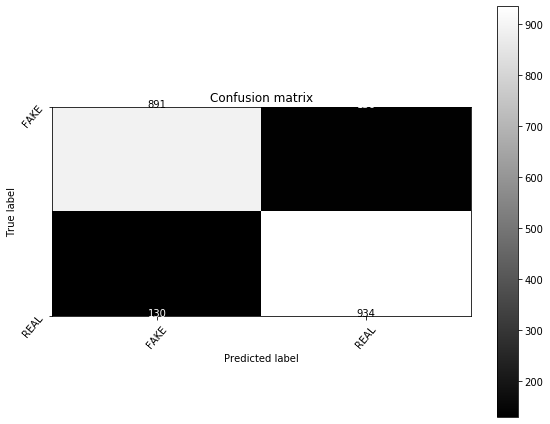

In [31]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f"% score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
cm
#from sklearn.metrics import plot_confusion_matrix


### Passive Aggresive Classiefier Algorithm

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(50)

accuracy:   0.878
Confusion matrix witout normalization


array([[905, 122],
       [133, 931]], dtype=int64)

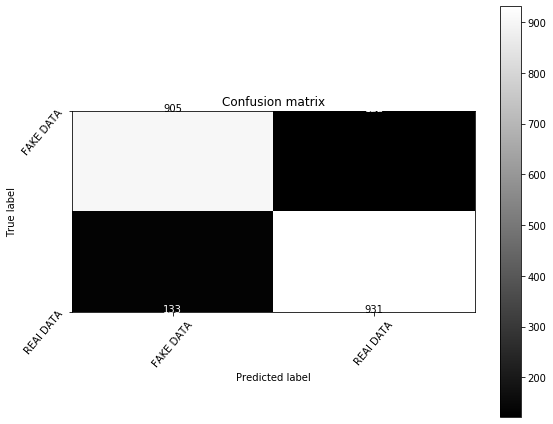

In [33]:
linear_clf.fit(x_train, y_train)
pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE DATA', 'REAl DATA'])
cm

## Multinomial Classifier with Hyperparameter

In [34]:
classifier=MultinomialNB(alpha=0.7)

In [35]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train, y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("alpha:  {}, Score:  {}".format(alpha,score))

C:\Users\ashutheman\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


alpha:  0.0, Score:  0.8790052606408417
alpha:  0.1, Score:  0.874701099952176
alpha:  0.2, Score:  0.8742228598756576
alpha:  0.30000000000000004, Score:  0.8737446197991392
alpha:  0.4, Score:  0.8737446197991392
alpha:  0.5, Score:  0.8737446197991392
alpha:  0.6000000000000001, Score:  0.8737446197991392
alpha:  0.7000000000000001, Score:  0.8737446197991392
alpha:  0.8, Score:  0.8732663797226208
alpha:  0.9, Score:  0.8732663797226208


In [36]:
#getting feature names
feature_names = cv.get_feature_names()

In [37]:
classifier.coef_[0]

array([ -9.10472788,  -8.6613147 ,  -9.77251297, ..., -11.35469195,
        -9.40160474, -13.93659087])

#### Most negative value means the most FAKEST word as it goes down and reach towards the least negative means we are getting most REAL words.

#### Here displaying the top 20 REAL words

In [38]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.486280418856465, 'said'),
 (-4.5999213661121665, 'trump'),
 (-4.928244288297616, 'clinton'),
 (-4.995743442291092, 'state'),
 (-5.244529754850108, 'republican'),
 (-5.289559205201435, 'would'),
 (-5.390507921951171, 'presid'),
 (-5.405516686743772, 'one'),
 (-5.458392637125558, 'say'),
 (-5.4900824544107305, 'campaign'),
 (-5.508617550798155, 'peopl'),
 (-5.531223491448344, 'obama'),
 (-5.545994438954555, 'year'),
 (-5.558174548426706, 'democrat'),
 (-5.580375310509744, 'new'),
 (-5.653742618460591, 'like'),
 (-5.664190558985354, 'time'),
 (-5.690652455612369, 'parti'),
 (-5.6979658511859, 'also'),
 (-5.7681989372567095, 'polit')]

#### Here displaying the top 20 FAKE words

In [39]:
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-13.936590867682325, 'access pipelin'),
 (-13.936590867682325, 'brain forc'),
 (-13.936590867682325, 'brain forc html'),
 (-13.936590867682325, 'campaign infowar'),
 (-13.936590867682325, 'campaign infowar placement'),
 (-13.936590867682325, 'com health'),
 (-13.936590867682325, 'com health well'),
 (-13.936590867682325, 'com utm'),
 (-13.936590867682325, 'com utm medium'),
 (-13.936590867682325, 'content brain'),
 (-13.936590867682325, 'content brain forc'),
 (-13.936590867682325, 'dakota access'),
 (-13.936590867682325, 'dakota access pipelin'),
 (-13.936590867682325, 'ecuador'),
 (-13.936590867682325, 'euro'),
 (-13.936590867682325, 'forc html'),
 (-13.936590867682325, 'forc html im'),
 (-13.936590867682325, 'gmo'),
 (-13.936590867682325, 'health well infowar'),
 (-13.936590867682325, 'html')]

# TfidfVectorizer 

In [40]:
from sklearn .feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
x = tfidf_v.fit_transform(corpus).toarray()

In [41]:
y = message['label']

In [42]:
## dividing dataset into training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)


In [43]:
tfidf_v.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abdullah',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc']

In [44]:
count_df = pd.DataFrame(x_train, columns= tfidf_v.get_feature_names())

In [45]:
count_df.head()

,abandon,abc,abc news,abdullah,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zulu
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.044947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.066547,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}